# Boosting Technique

In [1]:
#1.ADA Boost : Adaptor Boosting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To load dataset
df = pd.read_csv("heart (2).csv")

#To display first 5 record
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#How many samples
df.shape

(303, 14)

In [5]:
#To check null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#To cross check null value by datatype
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#To check all information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#For statistical operation
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#To check duplicate value
df.duplicated().sum()

1

In [10]:
#To remove the duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
#Cross check the duplicated rows
df.duplicated().sum()

0

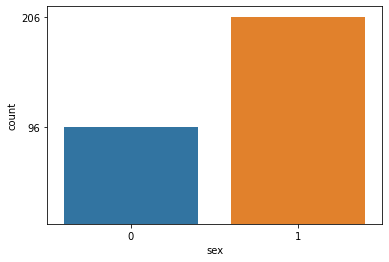

In [12]:
#How many samples in males and females
#Males means 1 and Female means 0
#sex : descrete means categorical datatype , use countplot()
sb.countplot(data=df,x='sex')
y = df['sex'].value_counts()
plt.yticks(y)
plt.show()

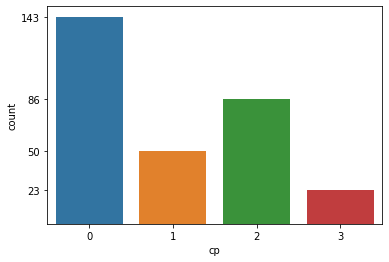

In [13]:
sb.countplot(data=df,x='cp')
y = df['cp'].value_counts()
plt.yticks(y)
plt.show()

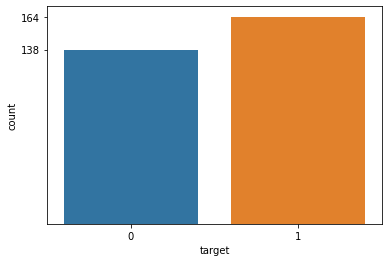

1    164
0    138
Name: target, dtype: int64


In [14]:
#Here output variable : target :
#How many samples for heart related patient and how many samples for 
#no heart related patients
sb.countplot(data=df,x='target')
y = df['target'].value_counts()
plt.yticks(y)
plt.show()
print(y)

In [15]:
#select input and output
x = df.drop("target",axis=1)   #input
y = df["target"]  #select output

In [16]:
#split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [17]:
x_train.shape , y_train.shape

((211, 13), (211,))

In [18]:
x_test.shape , y_test.shape

((91, 13), (91,))

In [19]:
#Apply StandardScaler on x_train,x_test
from sklearn.preprocessing import StandardScaler

#Create the object for StandardScaler class
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [20]:
#create user define function
def create_model(model):
    model.fit(x_train,y_train) #train the model with 70% data
    y_pred = model.predict(x_test)  #model test with 30% data
    
    #generate Report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    
    return model

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
#Performing base model means LogisticRegresssion
from sklearn.linear_model import LogisticRegression

In [23]:
#create the object for LogisticRegression class
lr = LogisticRegression()

In [24]:
#call the function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


In [25]:
#we get 0.83(83%) of recall value which is good but not better
#So we move to next classification which is Decision Tree Classifier

In [26]:
#Now let's Perform DecisionTreeClassifier with gini index
#calling the inbuilt class
from sklearn.tree import DecisionTreeClassifier

In [27]:
#create an object for DecisionTreeClassifier class
dtc = DecisionTreeClassifier(random_state=1)    #by default it takes GINI Index

In [28]:
#Now call the function
dtc = create_model(dtc)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]


In [29]:
#To check important faetures
dict = {"Input":x.columns,"IG":dtc.feature_importances_}
df2 = pd.DataFrame(dict)
df2.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


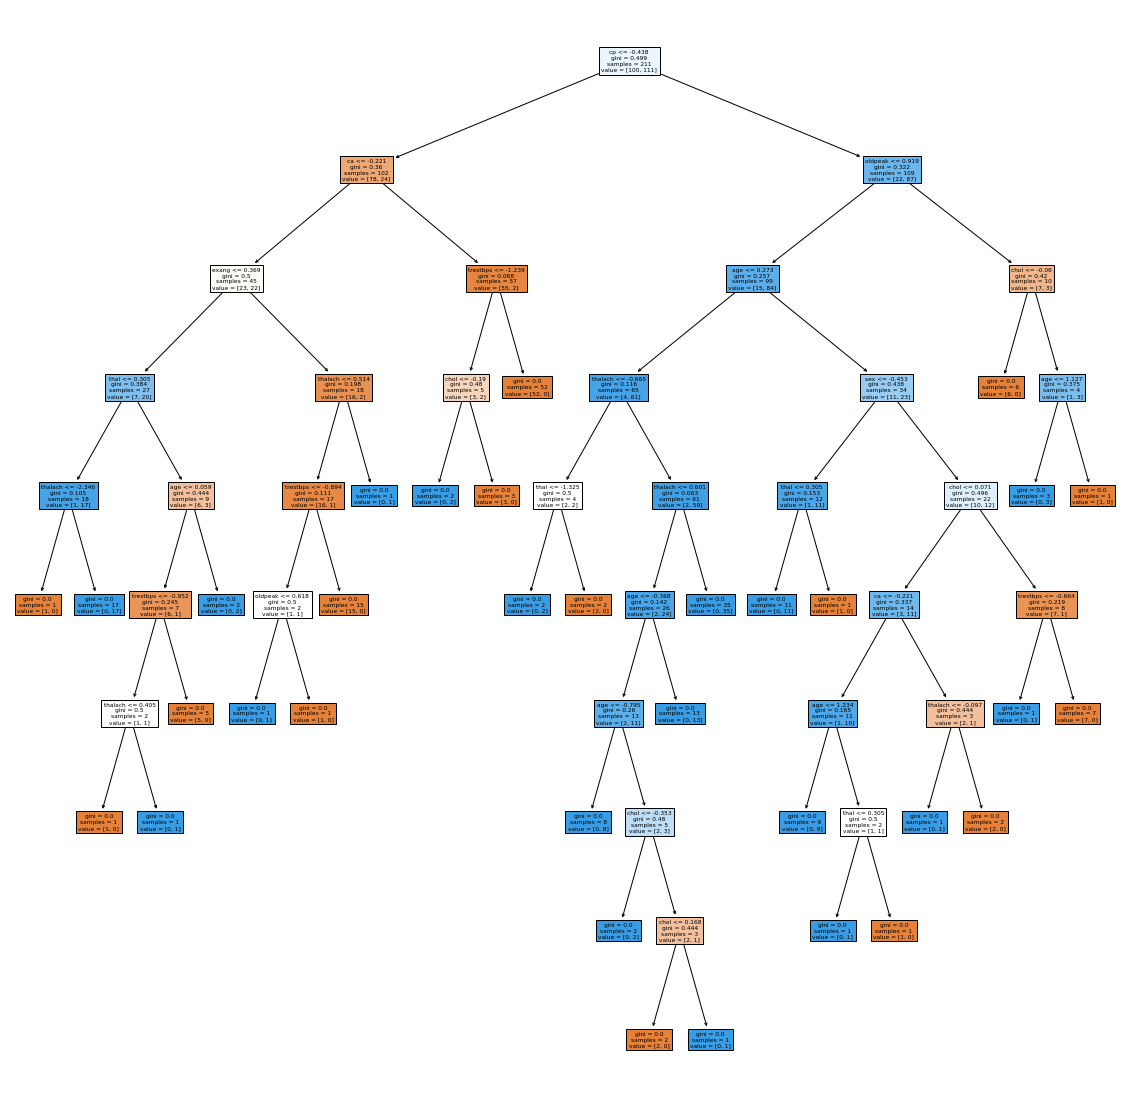

In [30]:
#Create a tree
from sklearn import tree

f = x.columns

plt.figure(figsize=(20,20))
_ = tree.plot_tree(dtc,feature_names=f,filled=True)
plt.show()

In [31]:
#But we got less score 0.70(70%) which is good but not better
#the reason behind the less score is overfitting
#So we reduce the overfitting by using Prunig Technique
#there are 2 types of pruning technique 
#1. max_depth and 2. min_samples_leaf

In [32]:
#Now apply pruning technique (i.e max_depth, min_samples_leaf)
#1.max_depth : the value of max depth is between 1 to 8 i.e it should not be greater than 8
#So we create for loop to find best score from max_depth
for i in range(1,9):
    dtc1 = DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max Depth :",i)
    #call function
    dtc1 = create_model(dtc1)

Max Depth : 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth : 2
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        38
           1       0.77      0.68      0.72        53

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

[[27 11]
 [17 36]]
Max Depth : 3
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73     

In [33]:
#By above for loop we get good score in max_depth=3
dtc1 = DecisionTreeClassifier(random_state=1,max_depth=3)
#call the function
dtc1 = create_model(dtc1)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]


In [34]:
#Now we check information gain
dict2 = {"Input":x.columns,"IG":dtc1.feature_importances_}
df3 = pd.DataFrame(dict2)
df3.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.513685
1,ca,0.159350
2,exang,0.131743
3,oldpeak,0.084076
4,age,0.047148
5,chol,0.041540
6,trestbps,0.022457
7,sex,0.000000
8,fbs,0.000000
9,restecg,0.000000


In [35]:
#Now we apply second pruning method that is min_samples_leaf
#min_samples_leaf shoukd be between 45 to 100
#So we apply for loop to check the best score 
for i in range(45,101):
    dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Min Samples Leaf :",i)
    #call the function
    dtc2 = create_model(dtc2)

Min Samples Leaf : 45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70 

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 81
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 82
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70   

In [36]:
#by above mention for loop we got the good score in 45, so
dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call the function
dtc2 = create_model(dtc2)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [37]:
#To check the information gain
dict3 = {"Input":x.columns,"IG":dtc2.feature_importances_}
df4 = pd.DataFrame(dict3)
df4.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.704874
1,ca,0.218659
2,age,0.076467
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


In [38]:
#Here recall value is 0.72(72%) by using DecisionTreeClassifier with GINI Index

In [39]:
#Next we Perform DecisionTreeClassifier with entropy index
dt = DecisionTreeClassifier(random_state=1,criterion="entropy")
#call function
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]


In [40]:
#check information gain
dict4 = {"Input":x.columns,"IG":dt.feature_importances_}
df5 = pd.DataFrame(dict4)
df5.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.243182
1,ca,0.129411
2,age,0.108986
3,thal,0.097910
4,trestbps,0.096058
5,thalach,0.089420
6,chol,0.083485
7,exang,0.077822
8,oldpeak,0.045352
9,sex,0.028375


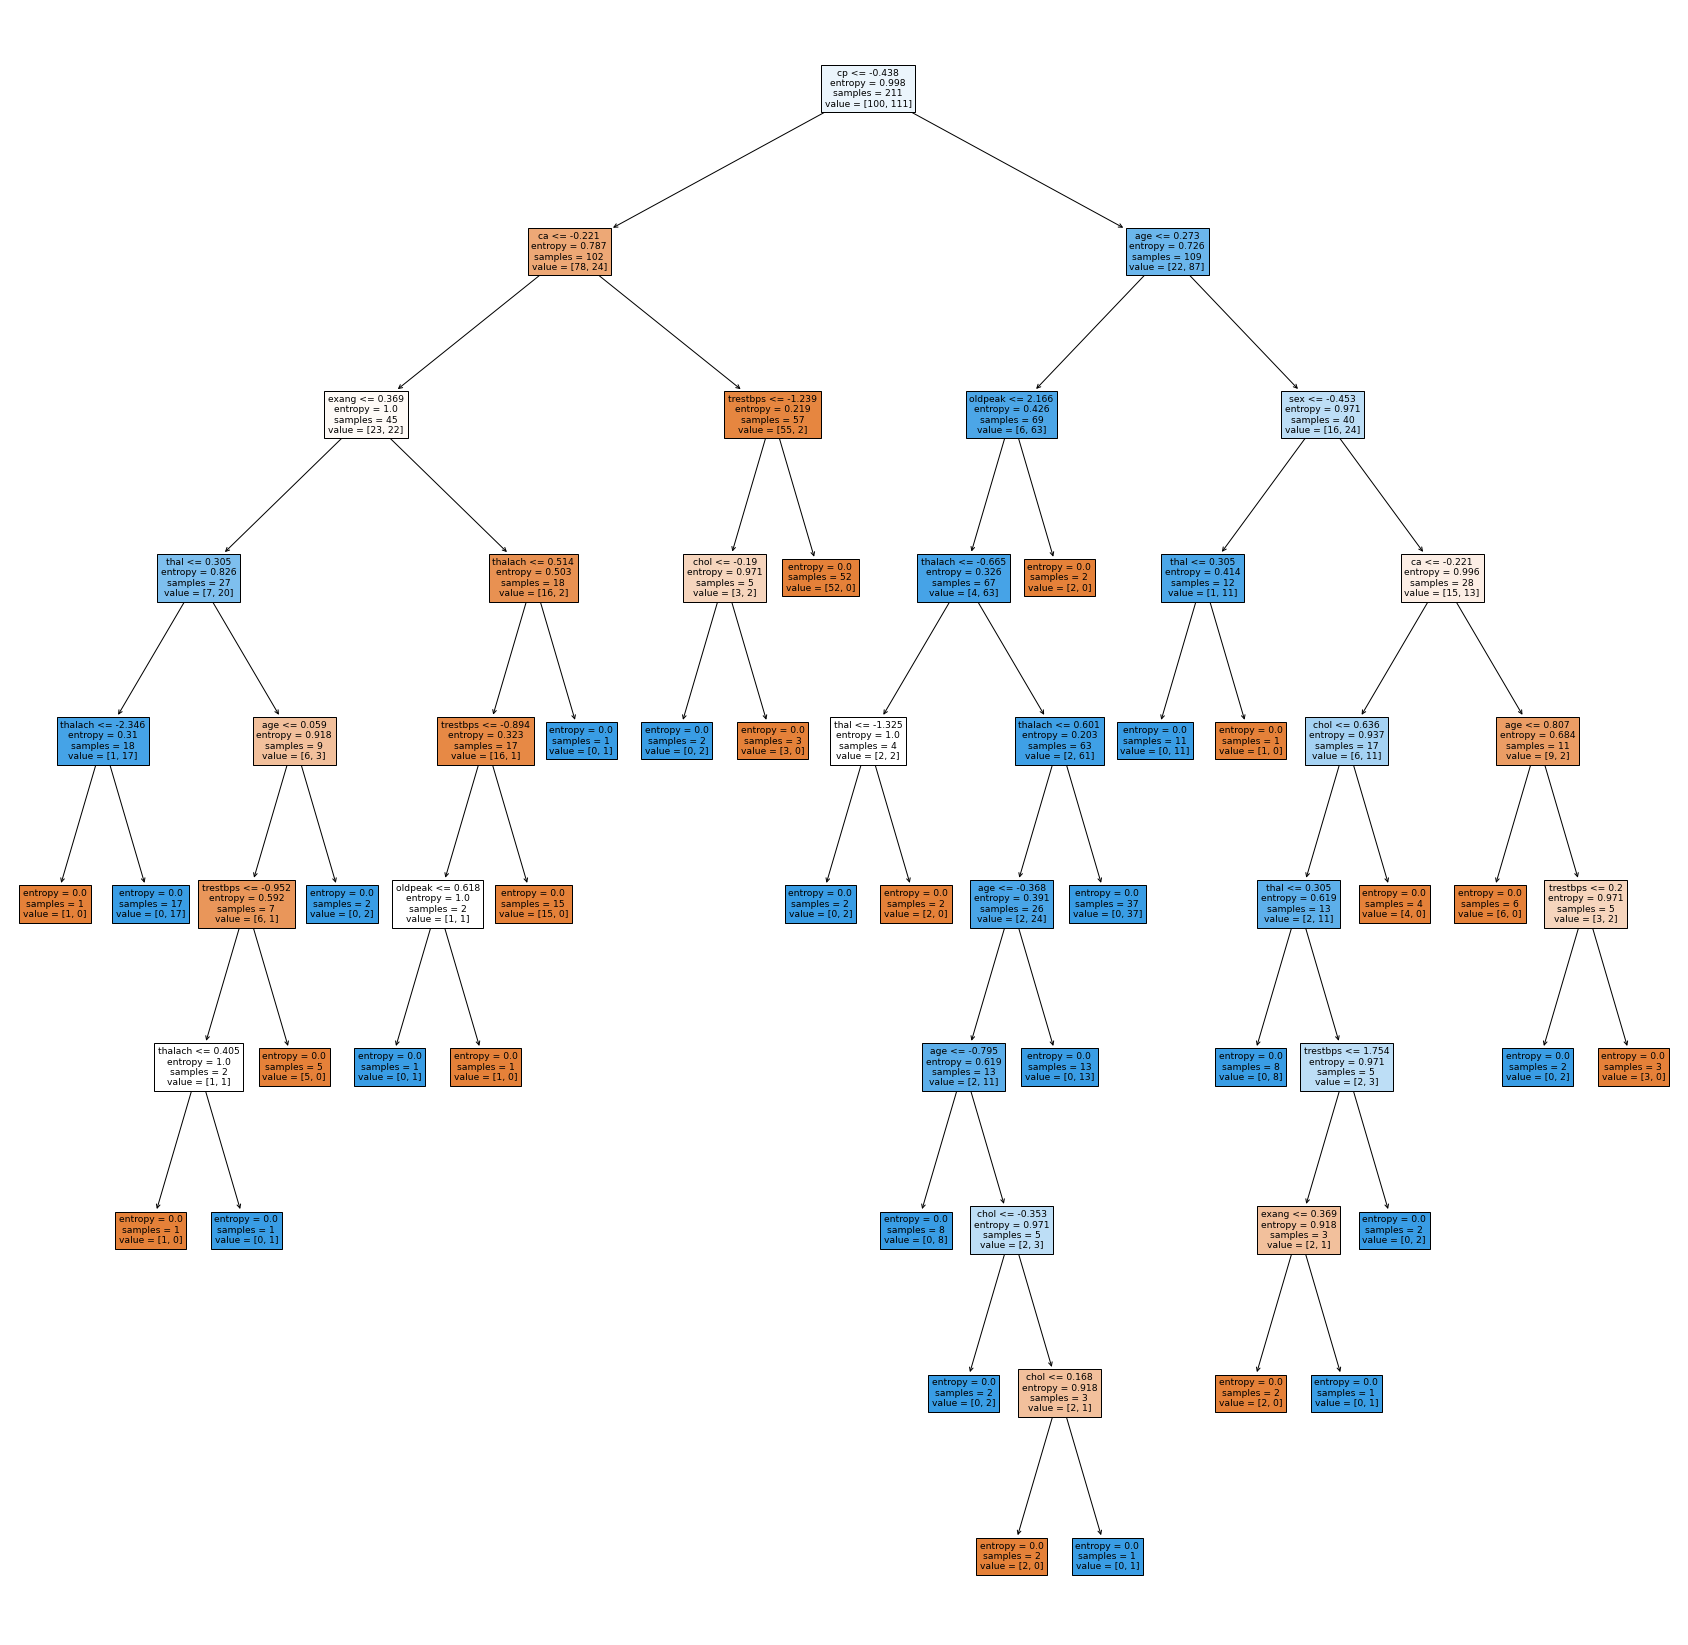

In [41]:
#plot a tree for entropy
f1 = x.columns
plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt,feature_names=f1,filled=True)
plt.show()

In [42]:
#we get recall score 0.70(70%) which is good but not best 
#So now we apply Pruning technique DecisionTreeClassifier class

In [43]:
#Apply pruning technique (max_depth, min_samples_leaf)
#1. max_depth : should between 1 to 8 (so we apply for loop with range)
for i in range(1,9):
    dt1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print("Max Depth :",i)
    #call function
    dt1 = create_model(dt1)

Max Depth : 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth : 2
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth : 3
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        38
           1       0.85      0.74      0.79        53

    accuracy                           0.77        91
   macro avg       0.77      0.78      0.77     

In [44]:
#from above for-loop we get the good recall score in 6
dt1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=6)
#call function
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[28 10]
 [13 40]]


In [45]:
#to check information gain
dict5 = {"Input":x.columns,"IG":dt1.feature_importances_}
df6 = pd.DataFrame(dict5)
df6.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.261707
1,ca,0.139269
2,age,0.112116
3,trestbps,0.101919
4,thalach,0.096232
5,thal,0.084927
6,exang,0.069672
7,chol,0.065036
8,oldpeak,0.038586
9,sex,0.030536


In [46]:
#we get recall score 75% by using max_depth 
#now we apply second pruning techinque i.e. min_samples_leaf
#in DecisionTreeClassifier with entropy index 
#min_samples_leaf should be between 45 to 100, so we use for-loop 
for i in range(45,101):
    dt2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print("Min Samples Leaf :",i)
    #calling the function
    dt2 = create_model(dt2)

Min Samples Leaf : 45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70 

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 81
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min Samples Leaf : 82
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70   

In [47]:
#from above loop we get good recall score in 45 
dt2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
#call function
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [48]:
#check information gain
dict6 = {"Input":x.columns,"IG":dt2.feature_importances_}
df7 = pd.DataFrame(dict6)
df7.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,cp,0.623586
1,ca,0.277669
2,age,0.098745
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


In [49]:
#We get 0.72(72%) of recall score in DecisionTreeClassifier with entropy index
#sames as we get in DecisionTreeClassifier with GINI Index
#So now we apply another classification : RandomForestClassifier

In [50]:
#Now apply RandomForestClassifier on given dataset
#call the inbuilt class
from sklearn.ensemble import RandomForestClassifier
#ensemble maens to train random dataset on multiple algorthim

In [51]:
#There is n_estimators in RandomForestClassifier class 
#means to take n number of DecisionTree
#n_estimators should be between 10 to 100 i.e >=10 to <=100
#so we apply for loop to check the best n_estimatos
for i in range(10,101):
    #create the object for RandomForestClassifier class
    rfc = RandomForestClassifier(n_estimators=i,random_state=1)
    print("n_estimators :",i)
    #call function
    rfc = create_model(rfc)   

n_estimators : 10
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        38
           1       0.80      0.66      0.72        53

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.71        91

[[29  9]
 [18 35]]
n_estimators : 11
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[28 10]
 [13 40]]
n_estimators : 12
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72   

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
n_estimators : 34
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
n_estimators : 35
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91


              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.83      0.72      0.77        53

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91

[[30  8]
 [15 38]]
n_estimators : 59
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
n_estimators : 60
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91


              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
n_estimators : 83
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]
n_estimators : 84
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91


In [52]:
#we got recall score in 81
rfc = RandomForestClassifier(n_estimators=81,random_state=1)
#call function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]


In [53]:
#to check information gain
dict7 = {"Input":x.columns,"IG":rfc.feature_importances_}
df8 = pd.DataFrame(dict7)
df8.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,cp,0.176114
1,thalach,0.124594
2,ca,0.098859
3,thal,0.098613
4,oldpeak,0.094800
5,trestbps,0.082581
6,chol,0.067916
7,age,0.067744
8,exang,0.066672
9,slope,0.057962


In [54]:
#the recall score is 0.77 (77%) which is good but not better
#So we apply purning techinque on RandomForestClassifier class
#1. Apply max_depth on RandomForestClassifier class 
#max_depth is between 1 to 8
for i in range(1,9):
    rfc1 = RandomForestClassifier(n_estimators=81,random_state=1,max_depth=i)
    #by default it takes gini index
    print("Max Depth :",i)
    #call the function
    rfc1 = create_model(rfc1)

Max Depth : 1
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]
Max Depth : 2
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.82      0.85      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91

[[28 10]
 [ 8 45]]
Max Depth : 3
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81     

In [55]:
#by above for loop we get the best score in max_depth=3
rfc1 = RandomForestClassifier(n_estimators=81,random_state=1,max_depth=3)
#call function
rfc1 = create_model(rfc1)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[29  9]
 [ 8 45]]


In [56]:
#to check ingormation gain
dict8 = {"Input":x.columns,"IG":rfc1.feature_importances_}
df9 = pd.DataFrame(dict8)
df9.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.255713
1,thal,0.131559
2,ca,0.122951
3,thalach,0.107599
4,exang,0.095504
5,oldpeak,0.086352
6,slope,0.076196
7,age,0.034793
8,trestbps,0.031337
9,sex,0.030292


In [57]:
#2. Now apply min_samples_leaf on RandomForestClassifier class
#min_samples_leaf should be between 45 to 100, so we apply for-loop to find the best score
for i in range(45,101):
    rfc2 = RandomForestClassifier(n_estimators=81,random_state=1,min_samples_leaf=i)
    print("Min Samples Leaf :",i)
    #call function
    rfc2 = create_model(rfc2)

Min Samples Leaf : 45
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]
Min Samples Leaf : 46
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]
Min Samples Leaf : 47
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79 

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        38
           1       0.69      0.85      0.76        53

    accuracy                           0.69        91
   macro avg       0.69      0.66      0.66        91
weighted avg       0.69      0.69      0.68        91

[[18 20]
 [ 8 45]]
Min Samples Leaf : 69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
Min Samples Leaf : 70
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37   

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
Min Samples Leaf : 92
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
Min Samples Leaf : 93
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37   

In [58]:
#by above loop we get the best recall score in 45
rfc2 = RandomForestClassifier(n_estimators=81,random_state=1,min_samples_leaf=45)
#call function
rfc2 = create_model(rfc2)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]


In [59]:
#check information gain
dict9 = {"Input":x.columns,"IG":rfc2.feature_importances_}
df10 = pd.DataFrame(dict9)
df10.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.259259
1,slope,0.148148
2,ca,0.148148
3,thal,0.147646
4,thalach,0.123457
5,oldpeak,0.072688
6,chol,0.049383
7,age,0.027710
8,exang,0.023059
9,restecg,0.000502


In [60]:
#We get recall score 81% with pruning tech. in RandomForestClassifier class

In [61]:
#Apply Ensembling Technique Boosting
#1.First Apply ADA Boost : call inbuild class AdaBoostClassifier

In [62]:
#Call the class
from sklearn.ensemble import AdaBoostClassifier

In [63]:
#instead of hit and trial methd we use for loop
for i in range(1,14):
    ada = AdaBoostClassifier(n_estimators=i,random_state=1)
    print("Number of Decision Stump :",i)
    #call the function
    ada = create_model(ada)

Number of Decision Stump : 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Number of Decision Stump : 2
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        38
           1       0.88      0.55      0.67        53

    accuracy                           0.69        91
   macro avg       0.73      0.72      0.69        91
weighted avg       0.76      0.69      0.69        91

[[34  4]
 [24 29]]
Number of Decision Stump : 3
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   

In [64]:
#Create an object of AdaBoostClassifier class
#ADA Boost create decision stump (means one root node and 2 leaf node)
#leaf node : means no any child
ada = AdaBoostClassifier(n_estimators=6,random_state=1)
#n_estimators means how many decision stump , decision stump depend on
#no. of input, we get n_estimators by applying for loop 
#in case of our dataset , no. of features means input=13
#call function
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.80      0.81      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[27 11]
 [10 43]]


In [65]:
#check important feature
dict = {"Input":x.columns,"IG":ada.feature_importances_}
df1 = pd.DataFrame(dict)
df1.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,sex,0.166667
1,cp,0.166667
2,thalach,0.166667
3,oldpeak,0.166667
4,slope,0.166667
5,ca,0.166667
6,age,0.000000
7,trestbps,0.000000
8,chol,0.000000
9,fbs,0.000000


In [66]:
x.shape

(302, 13)

# Day 29(Gradient Boosting)

In [ ]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error

In [68]:
#call inbuilt class for Gradient Boosting : GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
#create object for GradientBoostingClassifier class
#and passing the parameter n_estimators means how many Iteration means
#how many DecisionTree use for train the model
#n_estimators >=10 and <=100
#create for loop
for i in range(10,101):
    gbc = GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("n_estimators:",i)
    #call function
    gbc = create_model(gbc)

n_estimators: 10
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]
n_estimators: 11
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]
n_estimators: 12
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      

n_estimators: 37
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
n_estimators: 38
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
n_estimators: 39
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      

              precision    recall  f1-score   support

           0       0.64      0.76      0.70        38
           1       0.80      0.70      0.75        53

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.74      0.73      0.73        91

[[29  9]
 [16 37]]
n_estimators: 62
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        38
           1       0.78      0.68      0.73        53

    accuracy                           0.70        91
   macro avg       0.70      0.71      0.70        91
weighted avg       0.72      0.70      0.71        91

[[28 10]
 [17 36]]
n_estimators: 63
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        38
           1       0.78      0.68      0.73        53

    accuracy                           0.70        91
   macro avg       0.70      0.71      0.70        91
we

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
n_estimators: 85
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
n_estimators: 86
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
we

In [70]:
#from above loop
gbc = GradientBoostingClassifier(n_estimators=11,random_state=1)
#call function
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]


In [71]:
#check information gain (Gradient Boost)
dict10 = {"Input":x.columns,"IG":gbc.feature_importances_}
df11 = pd.DataFrame(dict10)
df11.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.428971
1,ca,0.151844
2,thalach,0.085778
3,exang,0.077987
4,thal,0.065412
5,oldpeak,0.064054
6,sex,0.042441
7,age,0.030353
8,trestbps,0.020001
9,slope,0.019248


In [ ]:
#Extreme Gradient Boost (XGB) : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [74]:
#call inbuilt class :XGBClassifier
#install xgboost
#!pip install xgboost

In [75]:
#now call inbuilt class
from xgboost import XGBClassifier
#here XGBClassifier is a inbuilt class which define in package xgboost

In [79]:
#create the object for XGBClassifier class
#create for loop from 10 to 100
for i in range(10,101):
    xgc = XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No. of estimator",i)
    #call function
    xgc = create_model(xgc)

No. of estimator 10
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]
No. of estimator 11
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No. of estimator 12
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0

[[28 10]
 [14 39]]
No. of estimator 36
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No. of estimator 37
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No. of estimator 38
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro av

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No. of estimator 62
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No. of estimator 63
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72       

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No. of estimator 87
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No. of estimator 88
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72       

In [77]:
#from above for n_estimators=10
xgc = XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#reg means regularization alpha maens lambda maens hyperparameter
#if reg_alpha=1 , 1 means True means automatic handle outlier and
#overfitting
#call function
xgc = create_model(xgc)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]


In [80]:
#check information gain (XGB)
dict11 = {"Input":x.columns,"IG":xgc.feature_importances_}
df12 = pd.DataFrame(dict11)
df12.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,cp,0.395594
1,exang,0.131480
2,ca,0.128074
3,thal,0.110132
4,slope,0.055303
5,oldpeak,0.041179
6,thalach,0.032251
7,sex,0.030614
8,trestbps,0.024462
9,age,0.020279
